In [1]:
# Install densratio
# git clone https://github.com/hoxo-m/densratio_py.git

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
from copy import deepcopy
from os import listdir

import algorithms
import classifiers

In [3]:
def get_label(T, T_change, window_size=500):
    S = np.zeros(len(T))
    #S[T_change] = 1
    for t in T_change:
        S[(T-t < 2 * window_size) * (T-t >= 0)] = 1
    return S

# Dataset

In [4]:
data_option = "iris_13noise"

In [5]:
iris_files = []
for i in listdir("iris_data/"):
    if i[-3:] == "csv":
         iris_files.append(i)
iris_files

['ABKT.II.00.BHZ.2012.102.07.45.00.041-2012.102.09.59.59.960.scale-1.csv',
 'ERM.II.00.BHZ.2012.102.07.45.00.020-2012.102.09.59.59.976.scale-1.csv',
 'FFC.II.00.BHZ.2012.102.07.45.00.019-2012.102.09.59.59.969.scale-1.csv',
 'JOHN.IU.00.BHZ.2012.102.07.45.00.019-2012.102.09.59.59.994.scale-1.csv',
 'KIEV.IU.00.BHZ.2012.102.07.45.00.010-2012.102.09.59.59.960.scale-1.csv',
 'KMI.IC.00.BHZ.2012.102.07.45.00.047-2012.102.09.59.59.997.scale-1.csv',
 'KONO.IU.00.BHZ.2012.102.07.45.00.019-2012.102.09.59.59.969.scale-1.csv',
 'NATX.US.00.BHZ.2012.102.07.45.00.000-2012.102.09.59.59.999.scale-1.csv',
 'NIL.II.00.BHZ.2012.102.07.45.00.019-2012.102.09.59.59.969.scale-1.csv',
 'OTAV.IU.00.BHZ.2012.102.07.45.00.019-2012.102.09.59.59.969.scale-1.csv',
 'PALK.II.00.BHZ.2012.102.07.45.00.019-2012.102.09.59.59.969.scale-1.csv',
 'PASC.CI.00.BHZ.2012.102.07.45.00.019-2012.102.09.59.59.994.scale-1.csv',
 'POHA.IU.00.BHZ.2012.102.07.45.00.019-2012.102.09.59.59.969.scale-1.csv',
 'TEIG.IU.00.BHZ.2012.102.07.

## Data generation

In [6]:
window_size = 500

if data_option == "kepler_2617":
    data = pd.read_csv("kepler_data/kepler_2617.csv")
    data = data.fillna(method='pad', axis=0)
    data = data.fillna(method='bfill', axis=0)
    X = data[['PDCSAP_FLUX']].values
    T = np.arange(len(X))
    T_change = [5840, 6150, 13015, 13320, 20187, 20512, 27356, 27677, 34531, 34838, 41707, 42015]
    S = get_label(T, T_change, window_size=window_size)
    
if data_option == "kepler_2619":
    data = pd.read_csv("kepler_data/kepler_2619.csv")
    data = data.fillna(method='pad', axis=0)
    data = data.fillna(method='bfill', axis=0)
    X = data[['PDCSAP_FLUX']].values
    T = np.arange(len(X))
    T_change = [1750, 2055, 8923, 9234, 16095, 16404, 23266, 23580, 30438, 30749, 37613, 37924]
    S = get_label(T, T_change, window_size=window_size)
    
if data_option == "kepler_2620":
    data = pd.read_csv("kepler_data/kepler_2620.csv")
    data = data.fillna(method='pad', axis=0)
    data = data.fillna(method='bfill', axis=0)
    X = data[['PDCSAP_FLUX']].values
    T = np.arange(len(X))
    T_change = [2423, 2734, 9602, 9908, 16768, 17080, 23947, 24257, 31118, 31427, 38288, 38605, 45473]
    S = get_label(T, T_change, window_size=window_size)
    
if data_option == "kepler_5622":
    data = pd.read_csv("kepler_data/kepler_5622.csv")
    #data = data.fillna(method='pad', axis=0)
    #data = data.fillna(method='bfill', axis=0)
    data = data.dropna()
    X = data[['PDCSAP_FLUX']].values
    T = np.arange(len(X))
    T_change = [808, 1081, 6005, 6284, 11200, 11473, 16402, 16674, 21587, 21861, 26787, 27059, 31982, 32254, 
                36651, 36928, 41852, 42120]
    S = get_label(T, T_change, window_size=window_size)
    
if data_option == "kepler_5624":
    data = pd.read_csv("kepler_data/kepler_5624.csv")
    #data = data.fillna(method='pad', axis=0)
    #data = data.fillna(method='bfill', axis=0)
    data = data.dropna()
    X = data[['PDCSAP_FLUX']].values
    T = np.arange(len(X))
    T_change = [2082, 2356, 7281, 7555, 12477, 12750, 17674, 17948, 22844, 23114, 28038, 28304, 
                33224, 33493, 37065, 37337]
    S = get_label(T, T_change, window_size=window_size)
    
if data_option == "kepler_5625":
    data = pd.read_csv("kepler_data/kepler_5625.csv")
    #data = data.fillna(method='pad', axis=0)
    #data = data.fillna(method='bfill', axis=0)
    data = data.dropna()
    X = data[['PDCSAP_FLUX']].values
    T = np.arange(len(X))
    T_change = [1446, 1716, 6626, 6897, 11662, 11938, 16867, 17136, 22062, 22334, 27255, 27533, 
                31281, 31556, 36480, 36755, 41671, 41955]
    S = get_label(T, T_change, window_size=window_size)
    
if data_option == "kepler_5626":
    data = pd.read_csv("kepler_data/kepler_5626.csv")
    #data = data.fillna(method='pad', axis=0)
    #data = data.fillna(method='bfill', axis=0)
    data = data.dropna()
    X = data[['PDCSAP_FLUX']].values
    T = np.arange(len(X))
    T_change = [2522, 2795, 7711, 7977, 12901, 13175, 18094, 18384, 23301, 23573, 28500, 28768, 
                33686, 33957, 38880, 39153]
    S = get_label(T, T_change, window_size=window_size)

if data_option == "kepler_9610":
    data = pd.read_csv("kepler_data/kepler_9610.csv")
    #data = data.fillna(method='pad', axis=0)
    #data = data.fillna(method='bfill', axis=0)
    data = data.dropna()
    X = data[['PDCSAP_FLUX']].values
    T = np.arange(len(X))
    T_change = [178, 3164, 3404, 6386, 6630, 9626, 9868, 12693, 12930, 15913, 16155, 19138, 19381, 22376, 22616, 
                25603, 25843, 28829, 29068, 30904, 31132, 34129, 34367, 37352, 37590, 40579, 40818]
    S = get_label(T, T_change, window_size=window_size)
    

    
    
    

    
if data_option == "iris_0":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:])], skiprows=18)
    X = data[[' Sample']].values[::20]
    T = np.arange(len(X))
    S = 1 * (T >= 8096)
    
if data_option == "iris_1":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 8851)
    
if data_option == "iris_2":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 7972)
    
if data_option == "iris_3":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 7471)
    
if data_option == "iris_4":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 8223)
    
if data_option == "iris_5":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 7647)
    
if data_option == "iris_6":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:])], skiprows=18)
    X = data[[' Sample']].values[::20]
    T = np.arange(len(X))
    S = 1 * (T >= 8769)
    
if data_option == "iris_7":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 7802)
    
if data_option == "iris_8":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 7275)
    
if data_option == "iris_9":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 8832)
    
if data_option == "iris_10":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:])], skiprows=18)
    X = data[[' Sample']].values[::20]
    T = np.arange(len(X))
    S = 1 * (T >= 8790)
    
if data_option == "iris_11":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 7084)
    
if data_option == "iris_12":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 6822)
    
if data_option == "iris_13":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 8312)
    

    
    
    
    
    
if data_option == "iris_0noise":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:-5])], skiprows=18)
    X = data[[' Sample']].values[::20]
    T = np.arange(len(X))
    S = 1 * (T >= 8096)
    noise_std = np.std(X[S == 0])
    X = X + np.random.normal(0, 3 * noise_std, len(X)).reshape(-1, 1)
    
if data_option == "iris_1noise":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:-5])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 8851)
    noise_std = np.std(X[S == 0])
    X = X + np.random.normal(0, 3 * noise_std, len(X)).reshape(-1, 1)
    
if data_option == "iris_2noise":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:-5])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 7972)
    noise_std = np.std(X[S == 0])
    X = X + np.random.normal(0, 3 * noise_std, len(X)).reshape(-1, 1)
    
if data_option == "iris_3noise":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:-5])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 7471)
    noise_std = np.std(X[S == 0])
    X = X + np.random.normal(0, 3 * noise_std, len(X)).reshape(-1, 1)
    
if data_option == "iris_4noise":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:-5])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 8223)
    noise_std = np.std(X[S == 0])
    X = X + np.random.normal(0, 3 * noise_std, len(X)).reshape(-1, 1)
    
if data_option == "iris_5noise":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:-5])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 7647)
    noise_std = np.std(X[S == 0])
    X = X + np.random.normal(0, 3 * noise_std, len(X)).reshape(-1, 1)
    
if data_option == "iris_6noise":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:-5])], skiprows=18)
    X = data[[' Sample']].values[::20]
    T = np.arange(len(X))
    S = 1 * (T >= 8769)
    noise_std = np.std(X[S == 0])
    X = X + np.random.normal(0, 3 * noise_std, len(X)).reshape(-1, 1)
    
if data_option == "iris_7noise":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:-5])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 7802)
    noise_std = np.std(X[S == 0])
    X = X + np.random.normal(0, 3 * noise_std, len(X)).reshape(-1, 1)
    
if data_option == "iris_8noise":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:-5])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 7275)
    noise_std = np.std(X[S == 0])
    X = X + np.random.normal(0, 3 * noise_std, len(X)).reshape(-1, 1)
    
if data_option == "iris_9noise":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:-5])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 8832)
    noise_std = np.std(X[S == 0])
    X = X + np.random.normal(0, 3 * noise_std, len(X)).reshape(-1, 1)
    
if data_option == "iris_10noise":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:-5])], skiprows=18)
    X = data[[' Sample']].values[::20]
    T = np.arange(len(X))
    S = 1 * (T >= 8790)
    noise_std = np.std(X[S == 0])
    X = X + np.random.normal(0, 3 * noise_std, len(X)).reshape(-1, 1)
    
if data_option == "iris_11noise":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:-5])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 7084)
    noise_std = np.std(X[S == 0])
    X = X + np.random.normal(0, 3 * noise_std, len(X)).reshape(-1, 1)
    
if data_option == "iris_12noise":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:-5])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 6822)
    noise_std = np.std(X[S == 0])
    X = X + np.random.normal(0, 3 * noise_std, len(X)).reshape(-1, 1)
    
if data_option == "iris_13noise":
    data = pd.read_csv("iris_data/"+iris_files[int(data_option[5:-5])], skiprows=18)
    X = data[[' Sample']].values[::10]
    T = np.arange(len(X))
    S = 1 * (T >= 8312)
    noise_std = np.std(X[S == 0])
    X = X + np.random.normal(0, 3 * noise_std, len(X)).reshape(-1, 1)

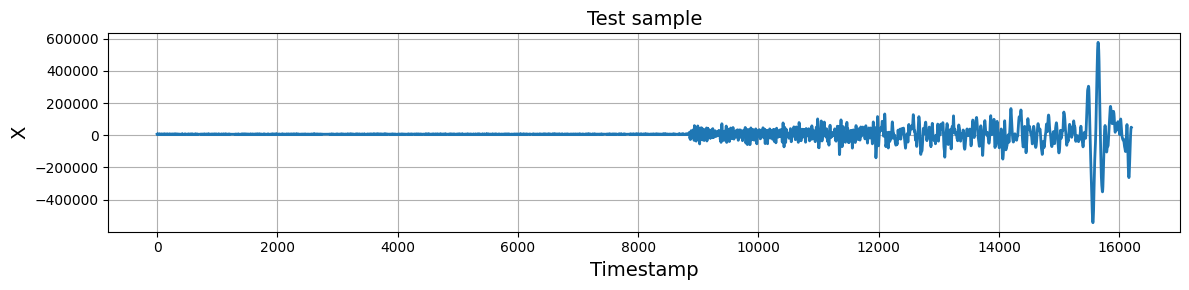

In [7]:
# Display test sample
plt.figure(figsize=(12, 3.))
plt.plot(T, X[:, 0], linewidth=2)
plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(True)
plt.title('Test sample', size=14)
plt.tight_layout()
plt.show()

In [8]:
import plotly.express as px

fig = px.line(x=T, y=X[:, 0])
fig.show()

## Change point detection

In [9]:
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb

In [10]:
periods = 10
window_size = window_size
step = 10
n_runs = 1


rulsif = algorithms.ChangePointDetectionRuLSIF(alpha=0.1, 
                                               sigma_range=[10.], # [0.1, 1., 10.], 
                                               lambda_range=[0.01], # [0.01, 0.1, 1.], 
                                               kernel_num=10,
                                               metric="PE", 
                                               periods=periods, 
                                               window_size=window_size, 
                                               step=step, 
                                               n_runs=1)



nn_base_classifier = classifiers.FitMyNN(n_hidden=10, dropout=0., n_epochs=20, batch_size=32, lr=0.1, 
                                         lam=0.0, optimizer="Adam", debug=0)
nn_classifier = algorithms.ChangePointDetectionClassifier(base_classifier=nn_base_classifier, 
                                                          metric="KL_sym", 
                                                          periods=periods, 
                                                          window_size=window_size, 
                                                          step=step, 
                                                          n_runs=1)


#gbdt_base_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, max_depth=6)
gbdt_base_classifier = xgb.XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=100, verbosity=0, subsample=0.8)
gbdt_classifier = algorithms.ChangePointDetectionClassifier(base_classifier=gbdt_base_classifier, 
                                                            metric="KL_sym", 
                                                            periods=periods, 
                                                            window_size=window_size, 
                                                            step=step, 
                                                            n_runs=1)


qda_base_classifier = QuadraticDiscriminantAnalysis()
qda_classifier = algorithms.ChangePointDetectionClassifier(base_classifier=qda_base_classifier, 
                                                          metric="KL_sym", 
                                                          periods=periods, 
                                                          window_size=window_size, 
                                                          step=step, 
                                                          n_runs=1)


base_classifier2 = classifiers.FitMyNN_RuLSIF(n_hidden=10, dropout=0., n_epochs=20, batch_size=32, lr=0.1, 
                                              lam=0., alpha=0.1, optimizer="Adam", debug=0)
nn_rulsif = algorithms.ChangePointDetectionClassifier_RuLSIF(base_classifier=base_classifier2, metric="PE", 
                                                             periods=periods, 
                                                             window_size=window_size, 
                                                             step=step, 
                                                             n_runs=1)



base_classifier21 = classifiers.GBDTRulSIF(n_estimators=100, learning_rate=0.2, sample_frac=0.8, alpha=0.1, 
                                           max_depth=4, min_samples_leaf=1)
gbdt_rulsif = algorithms.ChangePointDetectionClassifier_RuLSIF(base_classifier=base_classifier21, metric="PE", 
                                                               periods=periods, 
                                                               window_size=window_size, 
                                                               step=step, 
                                                               n_runs=1)

In [11]:
#print('RuLSIF')
#%time T_score_rulsif, score_rulsif = deepcopy(rulsif).predict(X/X[:, 0].max())
#
#print('NN')
#%time T_score_nn_classifier, score_nn_classifier = deepcopy(nn_classifier).predict(X/X[:, 0].max())
#
#print('QDA')
#%time T_score_qda_classifier, score_qda_classifier = deepcopy(qda_classifier).predict(X/X[:, 0].max())
#
#print('GBDT')
#%time T_score_gbdt_classifier, score_gbdt_classifier = deepcopy(gbdt_classifier).predict(X/X[:, 0].max())
#
#print('NN-RuLSIF')
#%time T_score_nn_rulsif, score_nn_rulsif = deepcopy(nn_rulsif).predict(X/X[:, 0].max())
#
#print('GBDT-RuLSIF')
#%time T_score_gbdt_rulsif, score_gbdt_rulsif = deepcopy(gbdt_rulsif).predict(X/X[:, 0].max())

RuLSIF


KeyboardInterrupt: 

NN


## Visualization

In [ ]:
score_rulsif = np.nan_to_num(score_rulsif)
score_nn_classifier = np.nan_to_num(score_nn_classifier)
score_gbdt_classifier = np.nan_to_num(score_gbdt_classifier)
score_qda_classifier = np.nan_to_num(score_qda_classifier)
score_nn_rulsif = np.nan_to_num(score_nn_rulsif)
score_gbdt_rulsif = np.nan_to_num(score_gbdt_rulsif)

## Saving

In [11]:
# Save data
df = pd.DataFrame()
df['T'] = T
df['S'] = S
for i in range(X.shape[1]):
    df["X"+str(i)] = X[:, i]
df.to_csv("results/"+data_option+"_data.csv", index=False)

# Save models outputs
df = pd.DataFrame()
df['T'] = T_score_rulsif
df['S'] = S[T_score_rulsif]
df['Score'] = score_rulsif
df.to_csv("results/"+data_option+"_RuLSIF.csv", index=False)

df = pd.DataFrame()
df['T'] = T_score_nn_classifier
df['S'] = S[T_score_nn_classifier]
df['Score'] = score_nn_classifier
df.to_csv("results/"+data_option+"_NN.csv", index=False)

df = pd.DataFrame()
df['T'] = T_score_gbdt_classifier
df['S'] = S[T_score_gbdt_classifier]
df['Score'] = score_gbdt_classifier
df.to_csv("results/"+data_option+"_GBDT.csv", index=False)

df = pd.DataFrame()
df['T'] = T_score_qda_classifier
df['S'] = S[T_score_qda_classifier]
df['Score'] = score_qda_classifier
df.to_csv("results/"+data_option+"_QDA.csv", index=False)

df = pd.DataFrame()
df['T'] = T_score_nn_rulsif
df['S'] = S[T_score_nn_rulsif]
df['Score'] = score_nn_rulsif
df.to_csv("results/"+data_option+"_NN_RuLSIF.csv", index=False)

df = pd.DataFrame()
df['T'] = T_score_gbdt_rulsif
df['S'] = S[T_score_gbdt_rulsif]
df['Score'] = score_gbdt_rulsif
df.to_csv("results/"+data_option+"_GBDT_RuLSIF.csv", index=False)

NameError: name 'T_score_rulsif' is not defined

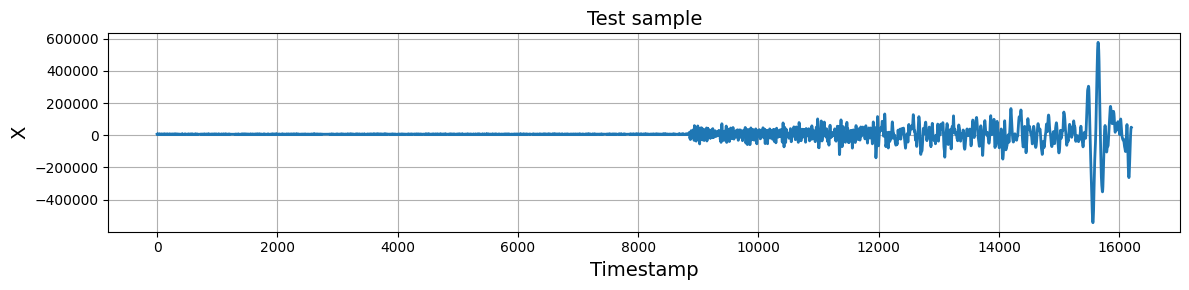

NameError: name 'T_score_rulsif' is not defined

<Figure size 1200x300 with 0 Axes>

In [12]:
# Display test sample
plt.figure(figsize=(12, 3.))
plt.plot(T, X, linewidth=2)
plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(True)
plt.title('Test sample', size=14)
plt.tight_layout()
plt.show()


# Display test sample
plt.figure(figsize=(12, 3.))
plt.plot(T_score_rulsif, score_rulsif, linewidth=3, label="RuLSIF")
plt.plot(T_score_nn_classifier, score_nn_classifier, linewidth=3, label="NN")
plt.plot(T_score_gbdt_classifier, score_gbdt_classifier, linewidth=3, label="GBDT")
plt.plot(T_score_qda_classifier, score_qda_classifier, linewidth=3, label="QDA")
plt.plot(T_score_nn_rulsif, score_nn_rulsif, linewidth=3, label="NN-RuLSIF")
plt.plot(T_score_gbdt_rulsif, score_gbdt_rulsif, linewidth=3, label="GBDT-RuLSIF")

plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(True)
plt.title('Change point detection score', size=14)
plt.legend(loc='best')
plt.tight_layout()
#plt.ylim(-0.2, 10.)
plt.show()

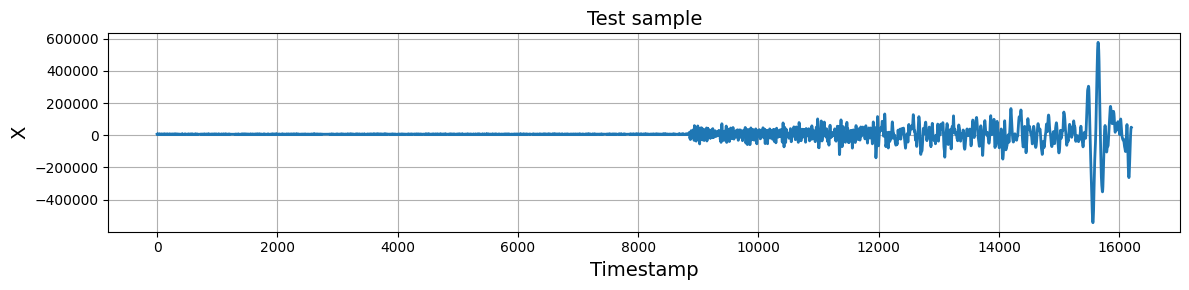

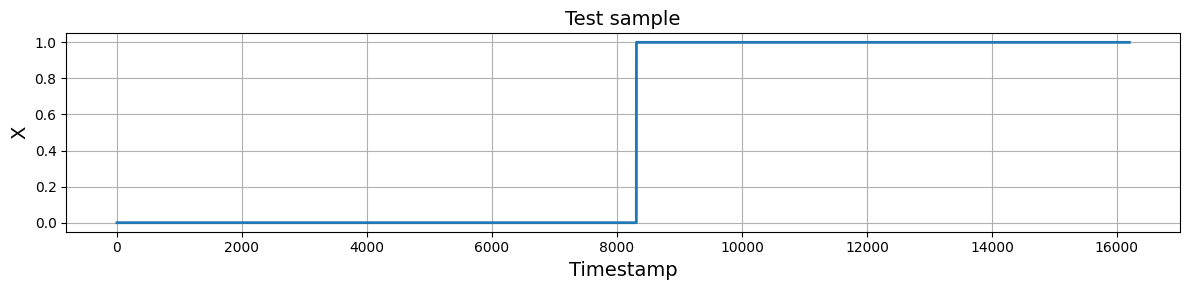

In [13]:
# Display test sample
plt.figure(figsize=(12, 3.))
plt.plot(T, X[:, 0], linewidth=2)
plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(True)
plt.title('Test sample', size=14)
plt.tight_layout()
plt.show()

# Display test sample
plt.figure(figsize=(12, 3.))
plt.plot(T, S, linewidth=2)
plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(True)
plt.title('Test sample', size=14)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(S[T_score_rulsif], score_rulsif)
auc = roc_auc_score(S[T_score_rulsif], score_rulsif)
plt.plot(fpr, tpr, label='RuLSIF', linewidth=3)
print("RuLSIF: ", auc)

fpr, tpr, _ = roc_curve(S[T_score_nn_classifier], score_nn_classifier)
auc = roc_auc_score(S[T_score_nn_classifier], score_nn_classifier)
plt.plot(fpr, tpr, label='NN', linewidth=3)
print("NN: ", auc)

fpr, tpr, _ = roc_curve(S[T_score_qda_classifier], score_qda_classifier)
auc = roc_auc_score(S[T_score_qda_classifier], score_qda_classifier)
plt.plot(fpr, tpr, label='QDA', linewidth=3)
print("QDA: ", auc)

fpr, tpr, _ = roc_curve(S[T_score_gbdt_classifier], score_gbdt_classifier)
auc = roc_auc_score(S[T_score_gbdt_classifier], score_gbdt_classifier)
plt.plot(fpr, tpr, label='GBDT', linewidth=3)
print("GBDT: ", auc)

fpr, tpr, _ = roc_curve(S[T_score_nn_rulsif], score_nn_rulsif)
auc = roc_auc_score(S[T_score_nn_rulsif], score_nn_rulsif)
plt.plot(fpr, tpr, label='NN-RuLSIF', linewidth=3)
print("NN-RuLSIF: ", auc)

fpr, tpr, _ = roc_curve(S[T_score_gbdt_rulsif], score_gbdt_rulsif)
auc = roc_auc_score(S[T_score_gbdt_rulsif], score_gbdt_rulsif)
plt.plot(fpr, tpr, label='GBDT-RuLSIF', linewidth=3)
print("GBDT-RuLSIF: ", auc)


plt.legend(loc='best')
#plt.ylim(0.5, 1.)
plt.show()

NameError: name 'T_score_rulsif' is not defined